# How to adjust learning rate

torch.optim.lr_scheduler provides several methods to adjust the learning rate based on the number of epochs.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
def create_optimizer():
    custom_weights = nn.Parameter(torch.tensor([1.0, 2.0]).unsqueeze(-1))
    print(custom_weights)
    
    custom_weights.grad = torch.ones((2,1))
    print(custom_weights.grad)
    
    learning_rate = 0.4
    optimizer = optim.SGD([custom_weights], lr=learning_rate)
    return optimizer

In [3]:
from matplotlib import pyplot as plt

def plot_lr(scheduler, title='', labels=['base'], nrof_epoch=100):
    lr_li = [[] for _ in range(len(labels))]
    epoch_li = list(range(nrof_epoch))
    for epoch in epoch_li:
        scheduler.step()  # 调用step()方法,计算和更新optimizer管理的参数基于当前epoch的学习率
        lr = scheduler.get_last_lr()  # 获取当前epoch的学习率
        for i in range(len(labels)):
            lr_li[i].append(lr[i])
    for lr, label in zip(lr_li, labels):
        plt.plot(epoch_li, lr, label=label)
    plt.grid()
    plt.xlabel('epoch')
    plt.ylabel('lr')
    plt.title(title)
    plt.legend()
    plt.show()

Parameter containing:
tensor([[1.],
        [2.]], requires_grad=True)
tensor([[1.],
        [1.]])


/home/sz/anaconda3/envs/cling/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:131: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


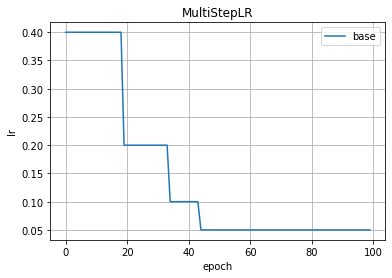

In [4]:
optimizer = create_optimizer()
scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[20, 35, 45], gamma=0.5)
plot_lr(scheduler, "MultiStepLR")

Parameter containing:
tensor([[1.],
        [2.]], requires_grad=True)
tensor([[1.],
        [1.]])


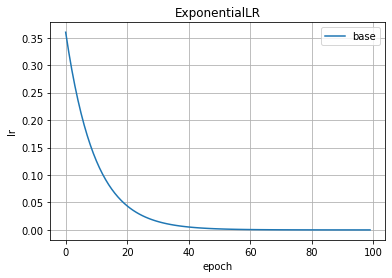

In [5]:
optimizer = create_optimizer()
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
plot_lr(scheduler, title='ExponentialLR')

Parameter containing:
tensor([[1.],
        [2.]], requires_grad=True)
tensor([[1.],
        [1.]])


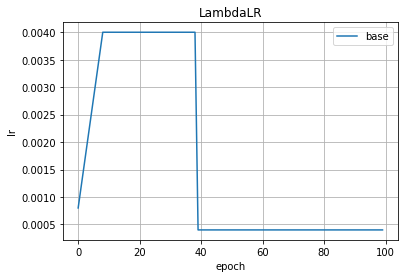

In [6]:
def lambda_foo(epoch):
    if epoch < 10:
        return (epoch+1) * 1e-3
    elif epoch < 40:
        return 1e-2
    else:
        return 1e-3

optimizer = create_optimizer()
scheduler = optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda_foo)
plot_lr(scheduler, title='LambdaLR')

Parameter containing:
tensor([[1.],
        [2.]], requires_grad=True)
tensor([[1.],
        [1.]])


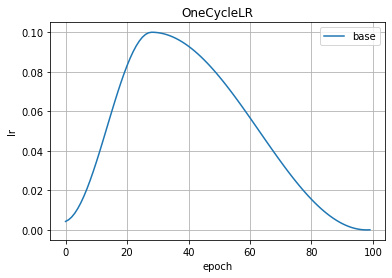

In [7]:
optimizer = create_optimizer()
scheduler = optim.lr_scheduler.OneCycleLR(optimizer, 0.1, total_steps=100)
plot_lr(scheduler, title='OneCycleLR')

# reference
* https://zhuanlan.zhihu.com/p/346205754